In [33]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [152]:
cd T:\freely_moving_ephys\ephys_recordings\092820\J524RT\whitenoise_hf1

T:\freely_moving_ephys\ephys_recordings\092820\J524RT\whitenoise_hf1


In [117]:
ls

 Volume in drive T is 8tb internal A
 Volume Serial Number is 7481-8BF5

 Directory of T:\freely_moving_ephys\ephys_recordings\092820\J524RT\hf1

09/29/2020  02:38 PM    <DIR>          .
09/29/2020  02:38 PM    <DIR>          ..
09/29/2020  02:38 PM    <DIR>          .phy
09/29/2020  02:25 PM       638,451,712 092820_J524RT_whitenoise_hf_Ephys_int16_med1_nch16.bin
09/29/2020  02:31 PM        23,209,644 092820_J524RT_whitenoise_hf_Ephys_int16_med1_nch16_ksSettings.mat
09/29/2020  02:25 PM        41,489,648 092820_J524RT_whitenoise_hf_Ephys_medianTrace.mat
09/29/2020  02:30 PM           694,744 amplitudes.npy
09/29/2020  02:27 PM           647,782 CAR_fig1.fig
09/29/2020  02:28 PM            32,262 CAR_fig2.fig
09/29/2020  02:30 PM               144 channel_map.npy
09/29/2020  02:30 PM               336 channel_positions.npy
09/29/2020  02:38 PM               605 cluster_Amplitude.tsv
09/29/2020  02:38 PM               522 cluster_ContamPct.tsv
09/29/2020  02:38 PM               569 clus

In [134]:
framerate = 30000
allSpikeT = np.load('spike_times.npy')
allSpikeT = allSpikeT/framerate  # should be a lookup table with timestamps
duration = np.max(allSpikeT)
duration

665.0385333333334

In [174]:
ephys_data = pd.read_csv('cluster_info.tsv',sep = '\t',index_col=0)
ephys_data


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh
id,,,,,,,,,,
0,321.1,46.6,mua,21.315399,0,1.0,2.859919,good,1902,0
1,198.9,0.0,mua,17.515968,0,1.0,0.078189,noise,52,0
2,350.2,9.5,mua,25.664024,0,1.0,5.937865,good,3949,0
3,307.9,0.0,mua,23.266666,0,1.0,0.088715,noise,59,0
4,222.0,67.3,mua,15.303047,2,3.0,1.658512,noise,1103,0
5,285.8,0.0,mua,20.071659,8,9.0,0.084204,noise,56,0
6,204.2,780.0,mua,14.895452,5,6.0,0.081196,noise,54,0
7,971.7,0.0,good,32.694916,4,5.0,0.494697,good,329,0
8,399.1,0.0,mua,25.630907,11,12.0,0.175926,noise,117,0


In [172]:
clust = np.load('spike_clusters.npy')
clust

array([41, 16, 61, ..., 41, 12, 31])

In [175]:
ephys_data['spikeT'] = nan
ephys_data['spikeT'] = ephys_data['spikeT'].astype(object)
ephys_data.dtypes

Amplitude    float64
ContamPct    float64
KSLabel       object
amp          float64
ch             int64
depth        float64
fr           float64
group         object
n_spikes       int64
sh             int64
spikeT        object
dtype: object

In [176]:
# get spiketimes for each cluster
for c in np.unique(clust):
    c
    ephys_data.at[c,'spikeT'] =allSpikeT[clust==c].flatten()



In [197]:
# get waveform templates
templates = np.load('templates.npy')
templates.shape
ephys_data['waveform'] = nan
ephys_data['waveform'] = ephys_data['spikeT'].astype(object)
for i, ind in enumerate(ephys_data.index):
    ephys_data.at[ind,'waveform']= templates[ind,21:,ephys_data.at[ind,'ch']]

In [198]:
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform
id,,,,,,,,,,,,
0,321.1,46.6,mua,21.315399,0,1.0,2.859919,good,1902,0,"[0.06143333333333333, 0.0725, 0.0982, 0.319466...","[0.010608896, -0.0027378588, -0.002996324, -0...."
2,350.2,9.5,mua,25.664024,0,1.0,5.937865,good,3949,0,"[0.10346666666666667, 0.24806666666666666, 0.4...","[0.0044924924, -0.0033818944, -0.004777348, -0..."
7,971.7,0.0,good,32.694916,4,5.0,0.494697,good,329,0,"[0.073, 0.17476666666666665, 0.207333333333333...","[0.0060715936, 0.010896905, 0.00887793, 0.0077..."
23,1250.0,0.0,good,64.190292,7,8.0,18.993950,good,12632,0,"[0.05623333333333334, 0.0608, 0.0822, 0.1031, ...","[0.00021674993, -0.0010089801, 0.00024007421, ..."
28,516.3,14.8,mua,41.329807,7,8.0,3.700452,good,2461,0,"[0.012433333333333333, 0.12983333333333333, 0....","[0.0050009307, 0.008511365, 0.008828017, 0.009..."
31,1824.4,15.8,mua,69.565178,8,9.0,22.130538,good,14718,0,"[0.0591, 0.1457, 0.20906666666666668, 0.3015, ...","[0.006277577, 0.01120119, 0.008944863, 0.00878..."
32,858.9,21.9,mua,58.978664,8,9.0,2.909539,good,1935,0,"[0.019266666666666668, 0.7055333333333333, 0.8...","[0.036005225, 0.0098562585, 0.017148694, 0.014..."
59,643.8,0.0,good,38.192627,11,12.0,0.766855,good,510,0,"[1.3816, 1.4074, 1.7556666666666667, 34.9598, ...","[0.025870776, 0.005830539, 0.010524722, 0.0080..."
61,707.0,0.0,good,40.266006,10,11.0,0.490186,good,326,0,"[0.009666666666666667, 9.154433333333333, 35.0...","[0.024087522, 0.004041113, 0.008603945, 0.0059..."


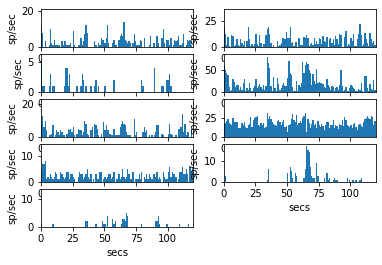

In [167]:
# plot spike firing rate
for i,ind in enumerate(goodcells.index):
   plt.subplot(5,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT'],bins = np.arange(0,np.max(allSpikeT),1))
   plt.xlim(0, 120); plt.xlabel('secs'); plt.ylabel('sp/sec')

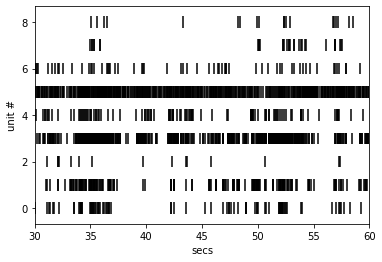

In [168]:
#spike rasters
for i,ind in enumerate(goodcells.index):
   plt.vlines(goodcells.at[ind,'spikeT'],i-0.25, i+0.25)
   plt.xlim(30,60); plt.xlabel('secs'); plt.ylabel('unit #')

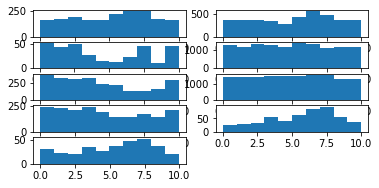

In [145]:
# cycle average firing rate
ncyc = duration/10
for i,ind in enumerate(goodcells.index):
   plt.subplot(7,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT']%10,bins = 10) # should be normalized by ncyc, so get data from hist and divide by ncyc before plotting
   plt.xlabel('secs')

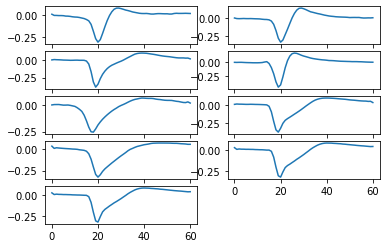

In [199]:
# plot waveforms
for i,ind in enumerate(goodcells.index):
   plt.subplot(5,2,i+1) 
   plt.plot(goodcells.at[ind,'waveform'])

In [196]:
(templates[0,:,3])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0042704 ,  0.0063731 ,  0.00573768,  0.00621083,
        0.00597216,  0.00639406,  0.00576465,  0.0050762 ,  0.00489531,
        0.00428397,  0.00261645,  0.00064669, -0.0021526 , -0.00506167,
       -0.00768049, -0.01108878, -0.01646524, -0.02442068, -0.03588611,
       -0.04736165, -0.05570746, -0.058939  , -0.05475423, -0.04489758,
       -0.0341426 , -0.02443255, -0.01720695, -0.01239983, -0.00849927,
       -0.00566558, -0.00306227, -0.00150979, -0.00206777, -0.00092576,
       -0.00043834, -0.00102888, -0.00195306, -0.00291474, -0.00350616,
       -0.00300054, -0.00412205, -0.00554374, -0.00576795, -0.00623595,
       -0.00650453, -0.00581031, -0.00552152, -0.00535551, -0.00

In [188]:
ephys_data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35,
            36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
            54, 55, 56, 57, 58, 59, 60, 61],
           dtype='int64', name='id')